<a href="https://colab.research.google.com/github/Laczadore/data_projects/blob/main/games_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Make imports**

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
data = files.upload()
data = pd.read_csv('vgsales.csv')

Saving vgsales.csv to vgsales (1).csv


**Take first look at data shape**

In [171]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [172]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Check for NaN values

In [173]:
data.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [174]:
data.shape

(16598, 11)

**Get rid off blank values**

In [175]:
data = data.dropna()

In [176]:
data.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [177]:
data.shape

(16291, 11)

In [178]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Take a look which genre is the most popular**

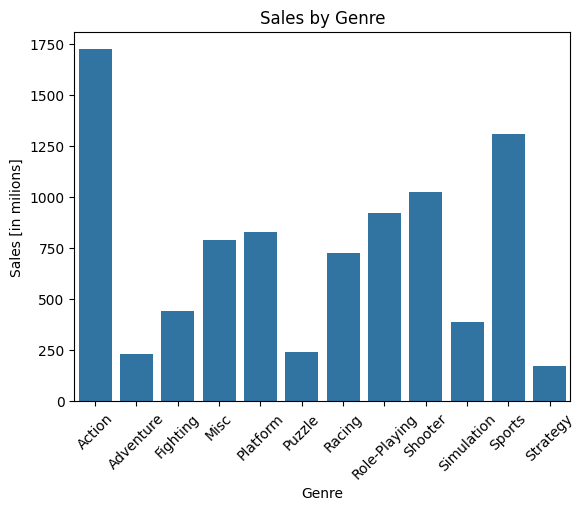

In [179]:
data_genre = data[['Genre', 'Global_Sales']].groupby('Genre').sum()


sns.barplot(data=data_genre, x='Genre', y='Global_Sales')
plt.xticks(rotation=45)
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales [in milions]')

plt.show()

**Do the same with the publishers**

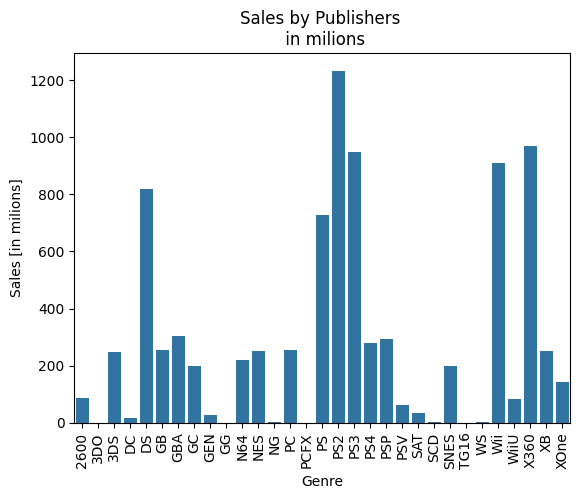

In [180]:
data_publisher = data[['Platform', 'Global_Sales']].groupby('Platform').sum()


sns.barplot(data=data_publisher, x='Platform', y='Global_Sales')
plt.xticks(rotation=90)
plt.title('Sales by Publishers \n in milions')
plt.xlabel('Genre')
plt.ylabel('Sales [in milions]')

plt.show()

**Make small table of how global sales were changing through years**

In [181]:
data_year = data[['Year', 'Global_Sales']].groupby('Year').sum()
data_year

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


**Let's change type of Year column to INT, so it does not appear with '.0' tail**

In [183]:
data['Year'] = data['Year'].astype(int)
data_year = data[['Year', 'Global_Sales']].groupby('Year').sum()

**Year 2016, 2017 and 2020 does not look reliable due to this high drop of global sales, so I would like to get rid of those 3 years for better visualizations**

In [184]:
data = data.drop(data[data['Year'] == 2020].index)
data = data.drop(data[data['Year'] == 2017].index)
data = data.drop(data[data['Year'] == 2016].index)

data_year = data[['Year', 'Global_Sales']].groupby('Year').sum()
data_year


,Global_Sales
Year,
1980,11.38
1981,35.77
1982,28.86
1983,16.79
1984,50.36
1985,53.94
1986,37.07
1987,21.74
1988,47.22


**Now we can go for some visualizations**

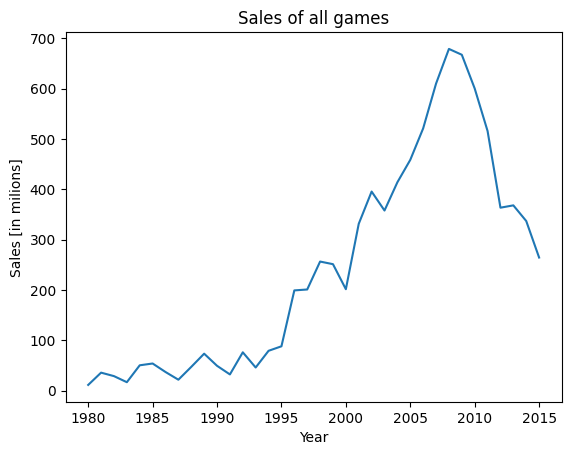

In [185]:
sns.lineplot(data=data_year, x='Year', y='Global_Sales')
plt.title(f'Sales of all games')
plt.xlabel('Year')
plt.ylabel('Sales [in milions]')
plt.show()

**This drop after ~2007 still looks strange but let's ignore that and focus on praciting the data analysis**


**I think good idea is defining a function to check sales in certain regions of different genres of games. It would be overwhelming to make chart for every genre at once. With the function everyone can check what is interesing him the most**

In [186]:
def sales_by_year(genre, region='Global'):
  data_by_genre = data[data['Genre'] == genre]
  data_by_genre = data_by_genre[['Year', 'Global_Sales', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Year').sum()

  if region=='Global':
    sns.lineplot(data=data_by_genre, x='Year', y='Global_Sales')
    plt.title(f'Sales of {genre} games by Year \n 1980-2015')
    plt.xlabel('Year')
    plt.ylabel('Global Sales [in milions]')


  elif region=='EU':

    sns.lineplot(data=data_by_genre, x='Year', y='EU_Sales')
    plt.title(f'Sales of {genre} games by Year \n 1980-2015')
    plt.xlabel('Year')
    plt.ylabel('EU Sales [in milions]')


  elif region=='NA':

    sns.lineplot(data=data_by_genre, x='Year', y='NA_Sales')
    plt.title(f'Sales of {genre} games by Year \n 1980-2015')
    plt.xlabel('Year')
    plt.ylabel('NA Sales [in milions]')


  elif region=='JP':

    sns.lineplot(data=data_by_genre, x='Year', y='JP_Sales')
    plt.title(f'Sales of {genre} games by Year \n 1980-2015')
    plt.xlabel('Year')
    plt.ylabel('JP Sales [in milions]')


  elif region=='Other':

    sns.lineplot(data=data_by_genre, x='Year', y='Other_Sales')
    plt.title(f'Sales of {genre} games by Year \n 1980-2015')
    plt.xlabel('Year')
    plt.ylabel('Sales in other regions [in milions]')


  return

**Function is very simple. First argument is genre (for example 'Action'), second argument is region (for example 'EU', or 'JP'). If you leave region argument blank, it will be treated as global**

**I will call function 3 times to show how it works**

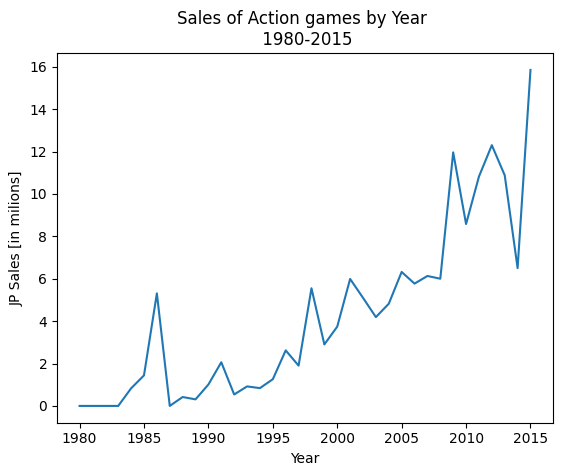

In [187]:
sales_by_year('Action', 'JP')

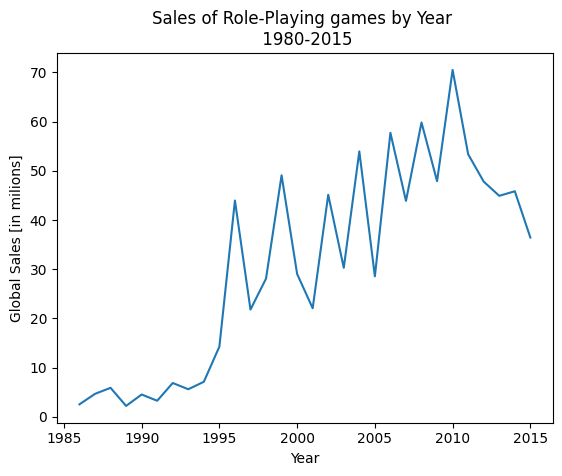

In [188]:
sales_by_year('Role-Playing')

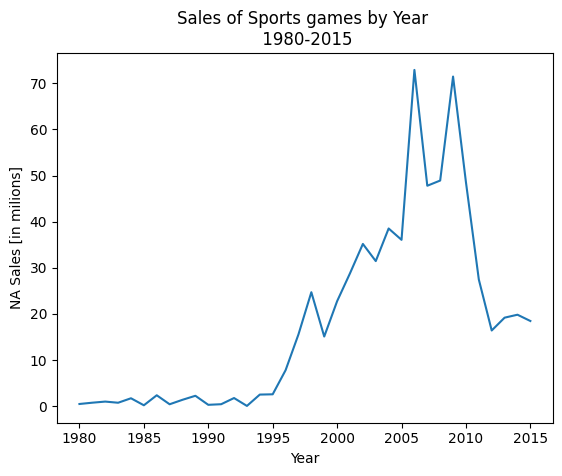

In [189]:
sales_by_year('Sports', 'NA')